<p style='color:black; font-size:32px; text-align:center'> <strong>Désigner le meilleur modèle de machine learning</strong>
</p>
<p style='color:grey; font-size:24px; text-align:center'> Rapport sur la prédiction du coût de la couverture médicale d'un.e américain.e pour une nouvelle compagnie d'assurance maladie</p>

# Sommaire <a class="anchor" id="Sommaire"></a>

* [Introduction](#intro)
* [Prérequis](#Imports)
* [I. Import des données](#donnees)
* [II. Phase exploratoire des données](#exp)
* [III. Division en sous-ensembles](#div)
* [IV. Régression linéaire multiple](#model)
* [V. Arbre de régression](#AR)
* [VI. Random Forest](#RF)
* [Conclusion générale](#Conclusion)

# Contexte et objectif du projet  <a class="anchor" id="intro"></a>

<p>Une nouvelle compagnie d'assurance maladie souhaite proposer une formule personnalisée à ses futurs.es clients.es.

Afin d'établir son business model, la compagnie doit être en mesure d'estimer les frais médicaux facturés par l'assurance santé pour ses prospects.

Elle fait appel à votre start-up qui développe des solutions en IA pour développer un modèle de machine learning capable de prédire les frais médicaux de ses prospects.

La compagnie d'assurance fournit à votre start-up un historique des dépenses en frais de santé.
</p>

# Prérequis <a class="anchor" id="Imports"></a>

In [281]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.sparse as sparse

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn import linear_model
from sklearn import metrics 
from sklearn import tree

import sidetable as stb

# PARTIE 1 : Import des données <a class="anchor" id="donnees"></a>

#### ⭱ [Haut de page](#Sommaire) 

In [179]:
# Import du fichier
df_cmed = pd.read_csv(r"https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv")

In [180]:
# Afficher les cinq premières lignes
df_cmed.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [181]:
# Afficher les cinq dernières lignes
df_cmed.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [182]:
# On vérifie la volumétrie de notre dataframe
df_cmed.shape

(1338, 7)

# PARTIE 2 : Phase exploratoire des données <a class="anchor" id="exp"></a>

#### ⭱ [Haut de page](#Sommaire) 

In [183]:
# Aperçu des informations, présence ou non d'éléments nulls, type de variables, mémoire...
df_cmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Les colonnes sex, smoker et region sont catégorielles. <br>La colonne age est une variable integer, tout comme la colonne children (nombre d'enfants). <br>Les colonnes bmi (body mass index ou indice de masse corporelle) et charges (la colonne à prédire pour le coût de la couverture médicale).</p>

> ## Valeurs manquantes

In [184]:
# Afficher les valeurs nulles
df_cmed.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> ## Vérification de l'absence de NaN cachés dans les colonnes string / object

In [185]:
# On vérifie le nombre de valeurs uniques dans la colonne sex : ici, male et female donc 2 !
df_cmed.sex.nunique()

2

In [186]:
# On vérifie le nombre de valeurs totales
df_cmed.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [187]:
# On vérifie le nombre de valeurs uniques dans la colonne smoker : ici, no et yes, donc 2 !
df_cmed.smoker.nunique()

2

In [188]:
# On vérifie le nombre de valeurs totales
df_cmed.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [189]:
# On vérifie le nombre de valeurs uniques dans la colonne region : 
# ici, southeast, northwest, southwest et northeast donc 4 !
df_cmed.region.nunique()

4

In [190]:
# On vérifie le nombre de valeurs totales
df_cmed.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

 > ## Statistiques descriptives

In [191]:
df_cmed.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">L'âge médian de l'échantillon étudié est de 39 ans, avec un minimum de 18 ans et un maximum de 64 ans. <br> Quant à l'indice de masse corporelle, il se situe en moyenne autour de 30.6 (classée comme de l'obésité). L'IMC minimum est de 15.96 (classée comme underweight) et le maximum est de 53.13 (classée comme de l'obésité morbide). <br> Le nombre d'enfants est en moyenne de 1. <br> Le coût de la couverture médicale (colonne charges) peut atteindre 63770 dollars mais il se situe plutôt autour d'une médiane de 9382 dollars.</p>

>  <i class="fa fa-bar-chart fa-2x" aria-hidden="true"></i> 
>  ## Visualisation des valeurs corrélées

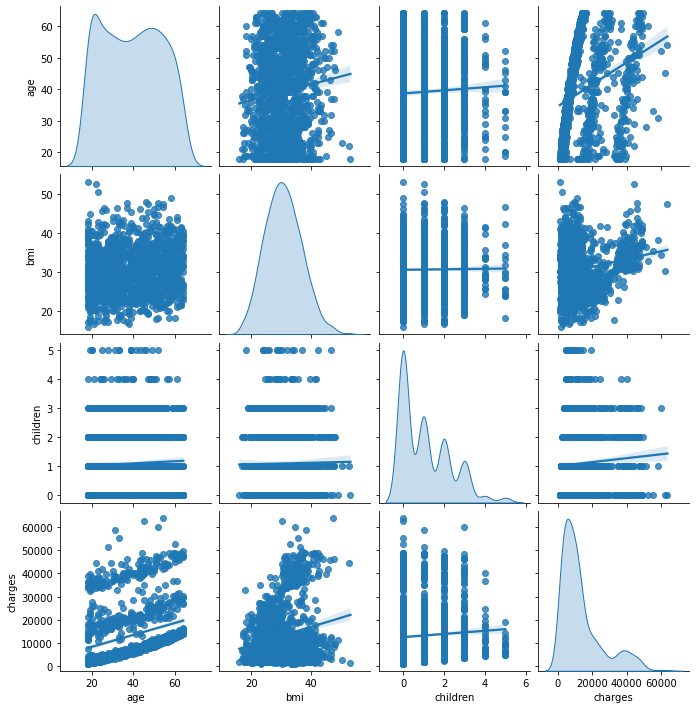

In [192]:
# Pairplot pour avoir une première idée des relations possibles entre les données et leurs distributions

sns.pairplot(df_cmed, kind='reg', diag_kind='kde');

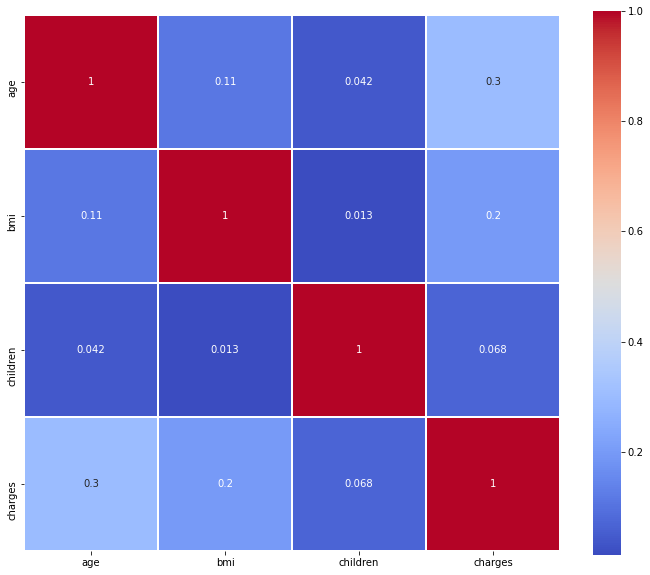

In [193]:
# Heatmap pour pouvoir identifier rapidement par code couleur les valeurs les plus corrélées

cor = df_cmed.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True );

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Les graphiques ne permettent pas de mettre en avant des corrélations vis-à-vis des variables numériques. La question qui se pose désormais est la suivante : est-ce que les corrélations (positives ou négatives) ne seraient pas plutôt du côté des variables catégorielles ? Nous devons les encoder en numérique pour pouvoir les traiter. </p>


> ## Encoder les variables catégorielles en variables numériques

In [194]:
# On affecte la fonction labelEncoder() à Encoder
Encoder = LabelEncoder()
# labelEncoder() va transformer / convertir les valeurs de la cible en chiffres (allant de 0 à n-1)

# On affecte cette transformation à la colonne sex de la dataframe avec .fit_transform
Encoder.fit_transform(df_cmed['sex'])
# On associe cette transformation sur la colonne sex à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_cmed['sex']=Encoder.fit_transform(df_cmed['sex'])

# On affecte cette transformation à la colonne smoker de la dataframe avec .fit_transform
Encoder.fit_transform(df_cmed['smoker'])
# On associe cette transformation sur la colonne smoker à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_cmed['smoker']=Encoder.fit_transform(df_cmed['smoker'])

# On affecte cette transformation à la colonne region de la dataframe avec .fit_transform
Encoder.fit_transform(df_cmed['region'])
# On associe cette transformation sur la colonne region à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_cmed['region']=Encoder.fit_transform(df_cmed['region'])

# On affiche les dix premières lignes de la dataframe une fois les modifications apportées
df_cmed.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Pour la colonne sex : 0 correspond à female, 1 correspond à male. <br> Pour la colonne smoker : 0 correspond à yes, 1 correspond à no. <br> Pour la colonne region : 0 correspond à Northeast, 1 correspond à Northwest, 2 correspond à Southeast, 3 correspond à Southwest.</p>

In [195]:
# On effectue une petite vérification pour voir le Dtype des colonnes ! 
df_cmed.info()
# Les colonnes sex, smoker et region sont devenues des integers !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


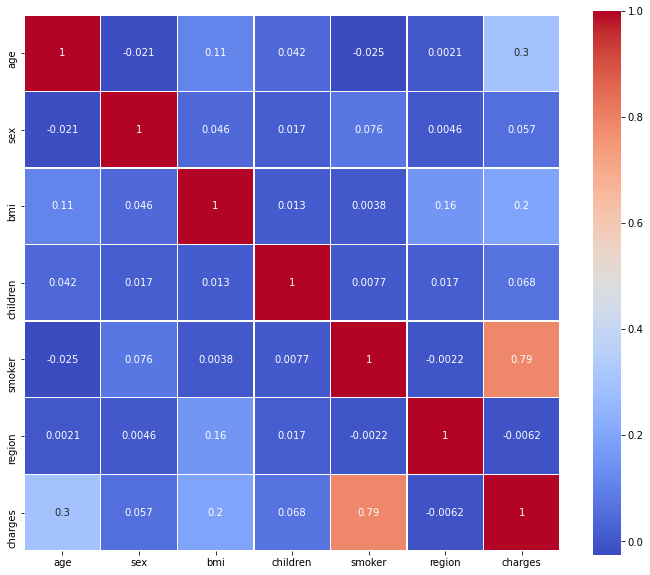

In [196]:
# Nous réalisons, exceptionnellement, une nouvelle heatmap pour voir s'il existe une différence avec la première !

cor = df_cmed.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True );

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Une corrélation positive retient toute notre attention : celle de la colonne smoker avec charges (0.79) ! <br> C'est la seule colonne qui semble être corrélée avec une autre.</p>

# PARTIE 3 : Division en sous-ensembles <a class="anchor" id="div"></a>

#### ⭱ [Haut de page](#Sommaire) 

> ## Paramètres du train_test_split
> <p> <li> random_state=0 <br> équivaut à ne pas régénérer l'aléatoire à chaque chargement du bloc, il suffit de le faire juste une fois). Le random_state sert à recevoir les mêmes valeurs sans devoir recharger le bloc à chaque fois. C'est comme si nous avions toujours le même générateur. On peut mettre dans random_state : int, RandomState, None.


> <li> Stratify = y      <br> Ce paramètre effectue un fractionnement afin que la proportion de valeurs dans l'échantillon produit soit la même que la proportion de valeurs fournies au paramètre stratify.
> 


> <li> shuffle= True     <br> mélanger des valeurs


> 
> <li> train_size        <br> la volumétrie de notre set d'entraînement


> 
> <li> test_size         <br> la volumétrie de notre set de test                                    
 </p> 

In [197]:
# Division en sous-ensembles Train et Test
# Dans stratify, on précise les colonnes que l'on veut pour que tout soit bien équitablement réparti !
train_set, test_set = train_test_split(df_cmed, test_size = 0.2, random_state = 0,
 stratify=df_cmed[['sex','smoker','region']])
 # Ici, les colonnes utilisées dans stratify sont sex, smoker et region !

In [198]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne sex dans les sous-ensemble Train
train_set.stb.freq(['sex'])

,sex,count,percent,cumulative_count,cumulative_percent
0,1,541,50.560748,541,50.560748
1,0,529,49.439252,1070,100.000000


In [199]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne sex dans les sous-ensemble Test
test_set.stb.freq(['sex'])

,sex,count,percent,cumulative_count,cumulative_percent
0,1,135,50.373134,135,50.373134
1,0,133,49.626866,268,100.000000


In [200]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne smoker dans les sous-ensemble Train
train_set.stb.freq(['smoker'])

,smoker,count,percent,cumulative_count,cumulative_percent
0,0,851,79.53271,851,79.53271
1,1,219,20.46729,1070,100.00000


In [201]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne smoker dans les sous-ensemble Test
test_set.stb.freq(['smoker'])

,smoker,count,percent,cumulative_count,cumulative_percent
0,0,213,79.477612,213,79.477612
1,1,55,20.522388,268,100.000000


In [202]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne region dans les sous-ensemble Train
train_set.stb.freq(['region'])

,region,count,percent,cumulative_count,cumulative_percent
0,2,291,27.196262,291,27.196262
1,3,261,24.392523,552,51.588785
2,1,260,24.299065,812,75.887850
3,0,258,24.112150,1070,100.000000


In [203]:
# On observe ici la distribution (ou la fréquence) des variables de la colonne region dans les sous-ensemble Test
test_set.stb.freq(['region'])

,region,count,percent,cumulative_count,cumulative_percent
0,2,73,27.238806,73,27.238806
1,0,66,24.626866,139,51.865672
2,1,65,24.253731,204,76.119403
3,3,64,23.880597,268,100.000000


In [204]:
# On divise une dernière fois notre dataframe, pour répartir au plus équitablement les variables dans X_train, y_train,
# X_test et y_test.
X_train = train_set.iloc[:,:-1] # On récupère les features (age, sex, bmi, children, smoker et region )
X_test = test_set.iloc[:,:-1] # On récupère les features (age, sex, bmi, children, smoker et region )
y_train = train_set['charges'] # On récupère la target (charges)
y_test = test_set['charges'] # On récupère la target (charges)

# PARTIE 4 : La Régression linéaire multiple <a class="anchor" id="model"></a>

#### ⭱ [Haut de page](#Sommaire) 

## Construction du modèle :  La Backward Elimination

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Que retenir ?**
> <p style="color:#4caba9;"> Nous devons observer la p-value et enlever les prédicteurs un par un jusqu'à obtenir une p-value inférieure ou proche de 0.05, sans perdre en performance.</p>

In [205]:
# Etape 1 : on choisit le seuil de significativité à 5% (0.05).

In [328]:
# Etape 2 : on construit le modèle de régression linéaire multiple
# Division de notre jeu de données en sous-ensembles
# 80% pour l'un (train), 20% pour l'autre (test)

# Cette étape 2 a déjà été réalisée préalablement !

In [207]:
# Application de la Régression linéaire avec toutes les features / prédicteurs

model = linear_model.LinearRegression() # On initialise le modèle de la régression linéaire

In [208]:
# On ajuste le modèle avec les features d'entraînement (x_train)
# et la target d'entraînement (y_train)

model.fit(X_train,y_train) 

LinearRegression()

> ## Utilisation de la méthode des moindres carrés MCO (OLS en anglais)

In [209]:
# Etape 3: les moindres carrés
# Vérification de la p-value et du R² 

# On utilise statsmodels.formula.api pour obtenir les moindres carrés !
# Dans le premier modèle, nous avons toutes les features
# Par contre, nous utilisons les données d'entraînement avec train_set !
regressor = smf.ols('charges~age+sex+bmi+children+smoker+region', data=train_set).fit() # On applique la méthode des moindres carrés
regressor.summary() # On affiche en sortie les résultats

OLS Regression Results 
 
 Dep. Variable: charges R-squared: 0.734 
 
 
 Model: OLS Adj. R-squared: 0.732 
 
 
 Method: Least Squares F-statistic: 488.4 
 
 
 Date: Tue, 26 Jan 2021 Prob (F-statistic): 2.33e-301 
 
 
 Time: 13:27:51 Log-Likelihood: -10856. 
 
 
 No. Observations: 1070 AIC: 2.173e+04 
 
 
 Df Residuals: 1063 BIC: 2.176e+04 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -1.114e+04 1069.512 -10.417 0.000 -1.32e+04 -9042.475 
 
 
 age 257.9582 13.576 19.001 0.000 231.319 284.598 
 
 
 sex -220.5424 380.116 -0.580 0.562 -966.405 525.320 
 
 
 bmi 317.2375 31.396 10.104 0.000 255.633 378.842 
 
 
 children 382.7752 159.145 2.405 0.016 70.501 695.050 
 
 
 smoker 2.331e+04 470.553 49.539 0.000 2.24e+04 2.42e+04 
 
 
 region -319.0095 173.609 -1.838 0.066 -659.665 21.646 
 
 
 
 
 Omnibus: 242.275 Durbin-Watson: 1.978 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 536.678 
 
 
 Skew: 1.247 Prob(JB): 2.90e-117 
 
 
 Kurtosis: 5.413 Cond. No. 292. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Interprétations**
> <p style="color:#4caba9;"> La p-value la plus haute est le sex à 56% (0.56) : elle est au-dessus de la SL. <br> Le R² ajusté est à 73%.
</p>

In [210]:
# Dans le deuxième modèle nous utilisons cette fois l'ensemble des données avec la dataframe df_cmed

regressor = smf.ols('charges~age+sex+bmi+children+smoker+region', data=df_cmed).fit() # On applique la méthode des moindres carrés
regressor.summary() # On affiche en sortie les résultats

OLS Regression Results 
 
 Dep. Variable: charges R-squared: 0.751 
 
 
 Model: OLS Adj. R-squared: 0.750 
 
 
 Method: Least Squares F-statistic: 668.1 
 
 
 Date: Tue, 26 Jan 2021 Prob (F-statistic): 0.00 
 
 
 Time: 13:27:52 Log-Likelihood: -13548. 
 
 
 No. Observations: 1338 AIC: 2.711e+04 
 
 
 Df Residuals: 1331 BIC: 2.715e+04 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -1.182e+04 955.130 -12.371 0.000 -1.37e+04 -9941.729 
 
 
 age 257.2881 11.886 21.647 0.000 233.971 280.605 
 
 
 sex -131.1106 332.811 -0.394 0.694 -784.001 521.780 
 
 
 bmi 332.5701 27.722 11.997 0.000 278.186 386.954 
 
 
 children 479.3694 137.644 3.483 0.001 209.346 749.393 
 
 
 smoker 2.382e+04 411.843 57.839 0.000 2.3e+04 2.46e+04 
 
 
 region -353.6400 151.927 -2.328 0.020 -651.682 -55.598 
 
 
 
 
 Omnibus: 299.003 Durbin-Watson: 2.088 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 713.975 
 
 
 Skew: 1.207 Prob(JB): 9.17e-156 
 
 
 Kurtosis: 5.642 Cond. No. 296. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Interprétations**
> <p style="color:#4caba9;"> La p-value la plus haute est toujours le sex 69% (0.69) : elle est au-dessus de la SL. <br> Elle est retirée du prochain modèle. Le R² ajusté est à 75%.
> Nous allons partir pour les prochains modèles sur l'ensemble des données (df_cmed).
</p>

In [212]:
# Dans le troisième modèle nous avons une feature de moins (le sex)
regressor = smf.ols('charges~age+bmi+children+smoker+region', data=df_cmed).fit() # On applique la méthode des moindres carrés
regressor.summary() # On affiche en sortie les résultats

OLS Regression Results 
 
 Dep. Variable: charges R-squared: 0.751 
 
 
 Model: OLS Adj. R-squared: 0.750 
 
 
 Method: Least Squares F-statistic: 802.2 
 
 
 Date: Tue, 26 Jan 2021 Prob (F-statistic): 0.00 
 
 
 Time: 13:27:52 Log-Likelihood: -13548. 
 
 
 No. Observations: 1338 AIC: 2.711e+04 
 
 
 Df Residuals: 1332 BIC: 2.714e+04 
 
 
 Df Model: 5 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -1.187e+04 945.876 -12.546 0.000 -1.37e+04 -1e+04 
 
 
 age 257.4050 11.878 21.670 0.000 234.103 280.707 
 
 
 bmi 332.0420 27.681 11.995 0.000 277.739 386.345 
 
 
 children 478.4405 137.580 3.478 0.001 208.543 748.338 
 
 
 smoker 2.381e+04 410.543 57.992 0.000 2.3e+04 2.46e+04 
 
 
 region -353.4491 151.878 -2.327 0.020 -651.395 -55.504 
 
 
 
 
 Omnibus: 299.380 Durbin-Watson: 2.088 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 715.644 
 
 
 Skew: 1.208 Prob(JB): 3.98e-156 
 
 
 Kurtosis: 5.646 Cond. No. 293. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Interprétations**
> <p style="color:#4caba9;"> Il n'y a plus de p-value au-dessus de notre seuil de significativité. Nous pourrions nous arrêter à ce modèle. Tout au plus, la p-value la plus haute est la region avec 2% (0.02). <br>Le R² ajusté est à 75%.
</p>

In [214]:
# Dans le quatrième modèle nous effectuons un test en retirant region
regressor = smf.ols('charges~age+bmi+children+smoker', data=df_cmed).fit() # On applique la méthode des moindres carrés
regressor.summary() # On affiche en sortie les résultats

OLS Regression Results 
 
 Dep. Variable: charges R-squared: 0.750 
 
 
 Model: OLS Adj. R-squared: 0.749 
 
 
 Method: Least Squares F-statistic: 998.1 
 
 
 Date: Tue, 26 Jan 2021 Prob (F-statistic): 0.00 
 
 
 Time: 13:27:53 Log-Likelihood: -13551. 
 
 
 No. Observations: 1338 AIC: 2.711e+04 
 
 
 Df Residuals: 1333 BIC: 2.714e+04 
 
 
 Df Model: 4 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -1.21e+04 941.984 -12.848 0.000 -1.4e+04 -1.03e+04 
 
 
 age 257.8495 11.896 21.675 0.000 234.512 281.187 
 
 
 bmi 321.8514 27.378 11.756 0.000 268.143 375.559 
 
 
 children 473.5023 137.792 3.436 0.001 203.190 743.814 
 
 
 smoker 2.381e+04 411.220 57.904 0.000 2.3e+04 2.46e+04 
 
 
 
 
 Omnibus: 301.480 Durbin-Watson: 2.087 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 722.157 
 
 
 Skew: 1.215 Prob(JB): 1.53e-157 
 
 
 Kurtosis: 5.654 Cond. No. 292. 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Interprétations**
> <p style="color:#4caba9;"> Il n'y a plus de p-value au-dessus de notre seuil de significativité depuis le troisième modèle, mais nous avons néanmoins essayé sans la region. Nous pourrions nous arrêter à ce modèle. La p-value est toujours très bonne. <br>Le R² ajusté est à 74%. Nous avons perdu de la performance et nous ne gardons pas ce modèle.
</p>

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion**
> <p style="color:#4caba9;">Nous conservons le troisième modèle, celui dans lequel nous avons écarté la feature sex. La p-value ne dépasse pas le seuil de significativité et le R² ajusté est à 75%, on se rapproche de 80% (qui est une bonne limite de performance pour le modèle).
</p>

In [230]:
# On génère le modèle avec les modifications appropriées, en reprenant depuis le splitting
train_set, test_set = train_test_split(df_cmed, test_size = 0.2, random_state = 0,
 stratify=df_cmed[['smoker','region']]) # ici, nous ne gardons que smoker et region dans le stratify !
# Nous répétons la division en sous-ensemble sans la colonne sex
X_train = train_set[['age','bmi','children','smoker','region']] # On récupère les features (age, bmi, children, smoker et region )
X_test = test_set[['age','bmi','children','smoker','region']]
y_train = train_set['charges'] # On récupère la target (charges)
y_test = test_set['charges']


# Nous passons à l'entraînement du modèle de la régression linéaire
model = linear_model.LinearRegression() # On initialise le modèle de la régression linéaire

model.fit(X_train,y_train) # On ajuste le modèle avec les features d'entraînement (X_train)
# et la target d'entraînement (y_train)

LinearRegression()

> ## Prédictions 

In [217]:
# Nous prédisons les variables y_pred à partir du jeu de test !
y_pred= model.predict(X_test) 
y_pred.shape 

(268,)

In [220]:
# Pour une meilleure lisibilité, on stocke la comparaison entre les valeurs actuelles et les predictions 
# dans une nouvelle df que l'on nomme df5
y_test = y_test.values.reshape(268,) # le .reshape permet de faire fonctionner le .flatten()
# On donne à y_test le même nombre de lignes que y_pred !
df5 = pd.DataFrame({'Actuelles': y_test.flatten(), 'Prédites': y_pred.flatten()}) 
# .flatten = méthode numpy qui renvoie une copie du tableau réduit en une seule dimension.
df5

,Actual,Predicted
0,11090.71780,15353.617877
1,8604.48365,8489.017797
2,2899.48935,5647.601477
3,6123.56880,6911.443662
4,13844.50600,23024.827791
...,...,...
263,11305.93455,11360.077817
264,10325.20600,14314.364334
265,10118.42400,11361.316210
266,13457.96080,13504.860001


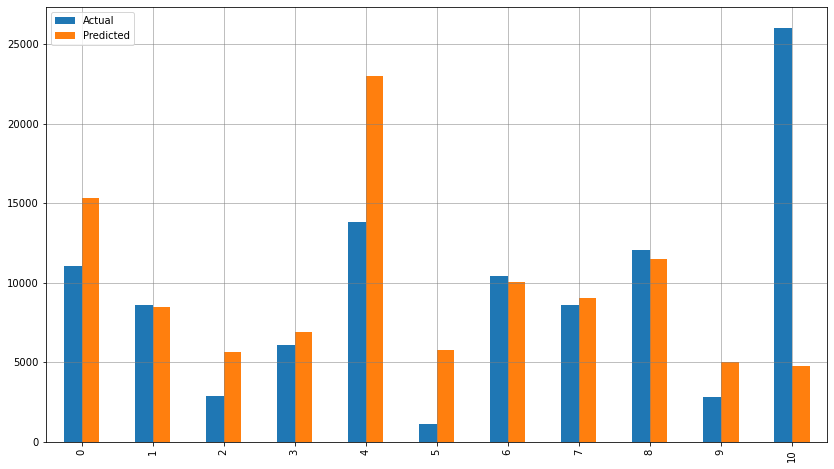

In [221]:
# Création d'un graph pour visualiser la comparaison "valeurs actuelles" / "predictions"

df6 = df5.head(11)
df6.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show();

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion de la régression linéaire multiple**
> <p style="color:#4caba9;">Le modèle utilisé ici montre que le fait d'être fumeur ou non a une influence sur le coût de la couverture médicale d'un.e américain.e. Toutefois, son score de R² ajusté est seulement de 75% alors qu'il faudrait au moins atteindre 80% pour que le modèle soit suffisamment performant. 
> Nous ne pensons pas retenir ce modèle pour le présenter à la compagnie d'assurance.</p>

# PARTIE 5 : L'arbre de décision (régression) <a class="anchor" id="AR"></a>

#### ⭱ [Haut de page](#Sommaire) 

> ## Construction du modèle 

In [232]:
# Nous construisons ici l'arbre de régression
# Nous lui indiquons, par défaut, un random_state=0 et un max_depth=3

regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

> ## Paramètres 
> <p>    <li> <strong>n_estimators</strong>: le nombre d’arbres différents à entraîner.<li><strong>criterion</strong> : c’est le critère statistique utilisé pour couper les feuilles de chaque arbre en cours de construction.<li><strong>max_depth</strong> : la profondeur maximale de chaque arbre, un critère très important qui dépend du niveau d’interaction entre les variables.
> 
Pour la plupart des problèmes, gérer ces trois paramètres devrait déjà vous donner des scores de classification tout à fait acceptables. Si vous recherchez encore un peu plus de performance dans votre modèle, vous pourrez paramétrer en plus :

> <li><strong>min_samples_split</strong>: le nombre minimum d’observations qu’il faut dans une feuille avant séparation. Ce critère est un contrôle supplémentaire qui permet d’éviter le sur-apprentissage. En effet, il peut arriver que, même avant d’atteindre la profondeur maximale, il faut stopper certaines branches de l’arbres avant pour éviter de se retrouver avec des feuilles trop isolées.
> <li><strong>min_samples_leaf</strong>: Le nombre minimum d'échantillons requis pour être au niveau d'un nœud feuille. Un point de partage à n'importe quelle profondeur ne sera pris en compte que s'il laisse au moins min_samples_leaf échantillons d'apprentissage dans chacune des branches gauche et droite. Cela peut avoir pour effet de lisser le modèle, notamment en régression.
> 
> <li><strong>max_features</strong> : le nombre maximum de variables qu’on tire aléatoirement pour chaque arbre. La valeur par défaut √𝑛 offre un excellent compromis sauf quelques exceptions.
> 
Enfin, il y a d’autres critères qui sont utiles bien que n’influencent pas le score du modèle :
> <li><strong>n_jobs</strong> : indique le nombre de coeurs de CPU utilisés pour la construction de l’arbre. Le random forest est un algorithme qui se parallélise bien vu que la construction de chaque arbre est indépendante des autres.
> <li><strong>verbose</strong> : ce paramètre permet de surveiller la construction des arbres.
 
</p>

> ## Entraînement de l'arbre de régression 

In [233]:
# Nous repartons du début pour ce nouveau modèle de machine learning !
# Division en sous-ensembles Train et Test
# Dans stratify, on précise les colonnes que l'on veut pour que tout soit bien équitablement réparti !
train_set, test_set = train_test_split(df_cmed, test_size = 0.2, random_state = 0,
 stratify=df_cmed[['sex','smoker','region']])

 # Avant de diviser, je stocke le dataframe dans 2 tableaux numpy  x et y pour séparer les variables dep et ind
X_trainA = train_set.iloc[:,:-1] # On récupère les features (age, sex, bmi, children, smoker et region )
X_testA = test_set.iloc[:,:-1]
y_trainA = train_set['charges'] # On récupère la target (charges)
y_testA = test_set['charges'] 

In [234]:
regressor.fit(X_trainA,y_trainA) # On entraîne le modèle !

DecisionTreeRegressor(max_depth=3, random_state=0)

> ## Prédiction

In [262]:
# On prédit nos variables y_predA
y_predA = regressor.predict(X_testA)
y_predA

array([38318.51073017,  6601.76355849,  6601.76355849, 14042.02470742,
       45591.27284608,  6601.76355849, 10536.11601449, 18637.02758492,
        6601.76355849,  6601.76355849, 45591.27284608,  6601.76355849,
        3340.40332065,  3340.40332065, 38318.51073017, 38318.51073017,
       10536.11601449,  6601.76355849, 24869.41710708, 14042.02470742,
       38318.51073017, 45591.27284608,  6601.76355849,  3340.40332065,
       45591.27284608,  3340.40332065,  6601.76355849, 14042.02470742,
       38318.51073017,  6601.76355849, 14042.02470742,  6601.76355849,
       45591.27284608, 24869.41710708, 45591.27284608,  6601.76355849,
        6601.76355849, 24869.41710708,  6601.76355849,  6601.76355849,
        6601.76355849,  3340.40332065,  6601.76355849, 14042.02470742,
        6601.76355849, 14042.02470742, 38318.51073017, 14042.02470742,
       18637.02758492, 45591.27284608, 10536.11601449,  3340.40332065,
        6601.76355849,  3340.40332065, 18637.02758492, 18637.02758492,
      

> <i class="fa fa-bar-chart fa-2x" aria-hidden="true"></i> 
> ## Visualisation

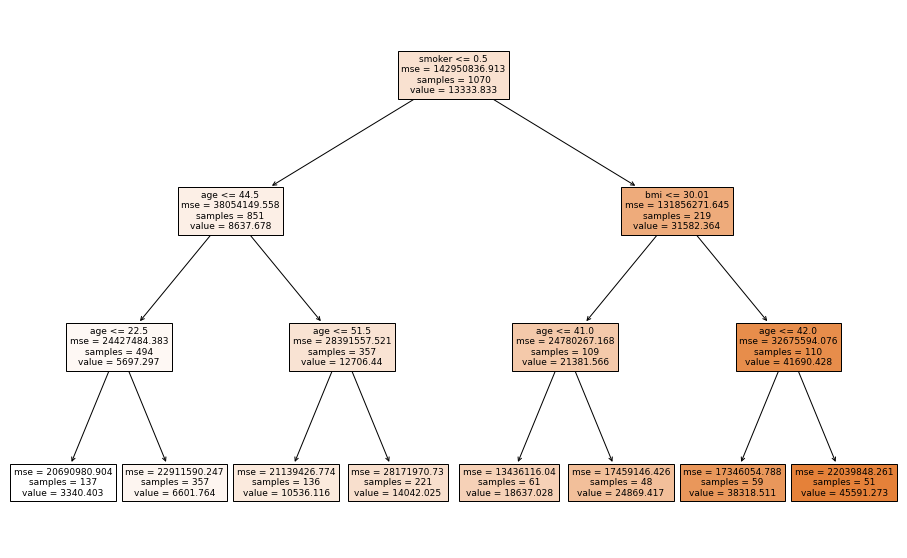

In [242]:
# On fait une visualisation de l'arbre de régression avec Matplotlib

plt.figure(figsize=(16,10))
tree.plot_tree(regressor,filled = True, feature_names = list(df_cmed.iloc[:,:-1]))
plt.show()

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
 <p style="color:#4caba9;">
Nous n'avons pas retenus graphviz car il ne fonctionnait pas sur Datalore.<br>
Sur le graphique, nous voyons bien la répartition en huit feuilles.</p>

> ## Feature engineering

> ### `Feature_importances`: déterminer les variables importantes <br>

In [330]:
# On détermine les variables importantes avec .feature_importances_
imp= regressor.feature_importances_
imp

array([0.11438004, 0.        , 0.17499723, 0.        , 0.71062272,
       0.        ])

In [291]:
# On donne des noms aux colonnes pour l'affichage que l'on fait ensuite
col = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [292]:
# Nous construisons un dataframe avec les feature_importances et je les trie par ordre décroissant

feature_importances = pd.DataFrame(regressor.feature_importances_, index= col,
                                    columns=['var_imp']).sort_values('var_imp', ascending=False)

feature_importances

# Que signifie les chiffres qui sont triés par ordre décroissant ?
# 4 = smoker
# 2 = IBM / IMC
# 0 = age
# Les autres variables n'apportent pas beaucoup d'informations

,var_imp
smoker,0.710623
bmi,0.174997
age,0.114380
sex,0.000000
children,0.000000
region,0.000000


> ### `Evaluation`: évaluer la qualité du modèle

In [265]:
# On évalue la qualité du modèle
regressor.score(X_trainA,y_trainA)

0.8436155296880752

In [266]:
print('Train Score: ', regressor.score(X_trainA, y_trainA))  # metric de performance 
print('Test Score: ', regressor.score(X_testA, y_testA))  

Train Score:  0.8436155296880752
Test Score:  0.8977549958033181


> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion de l'arbre de régression**
> <p style="color:#4caba9;">Le modèle utilisé ici montre que le fait d'être fumeur ou non a une influence sur le coût de la couverture médicale d'un.e américain.e. L'indice de masse corporelle puis l'âge ont également une influence, mais moindre.<br> Le score de R² ajusté du modèle est de 84%, ce qui le rend meilleur que la régression linéaire multiple.
> Nous attendons de voir le R² ajusté du random forest pour choisir le meilleur modèle.</p>

# PARTIE 6 : Le random forest (régression) <a class="anchor" id="RF"></a>

#### ⭱ [Haut de page](#Sommaire) 

> ## Construction du modèle 

In [331]:
# On construit le modèle de régression du random forest : RandomForestRegressor
# /!\ On va lui assigner des paramètres pour optimiser la performance du modèle !

Regressor_RF= RandomForestRegressor(random_state=0, min_samples_leaf=10,
                                   min_samples_split=30)

> ## Entraînement de l'arbre 

In [310]:
# Division en sous-ensembles Train et Test
# Dans stratify, on précise les colonnes que l'on veut pour que tout soit bien équitablement réparti !
train_set, test_set = train_test_split(df_cmed, test_size = 0.2, random_state = 0,
 stratify=df_cmed[['sex','smoker','region']])

 # Avant de diviser, je stocke le dataframe dans 2 tableaux numpy  x et y pour séparer les variables dep et ind
X_trainRF = train_set.iloc[:,:-1] # On récupère les features (age, sex, bmi, children, smoker et region )
X_testRF = test_set.iloc[:,:-1]
y_trainRF = train_set['charges'] # On récupère la target (charges)
y_testRF = test_set['charges'] 

In [327]:
# On entraîne le modèle !
Regressor_RF.fit(X_trainRF,y_trainRF)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=10, random_state=0)

> ### `Evaluation`: évaluer la qualité du modèle

In [320]:
# On vérifie la qualité du modèle avec le score !
Regressor_RF.score(X_testRF,y_testRF)

0.9126782094946796

> ### ` GridSearchCV`: Déterminer les paramètres optimaux <br>

In [332]:
# Nous utilisons GridSearchCV pour déterminer quels sont les paramètres optimaux
# On donne une liste/range de chiffres allant de 1 à 10 aux paramètres sur lesquels on veut enquêter !
grid_cv= GridSearchCV(Regressor_RF, param_grid = {'n_estimators' : range(1, 11),'max_depth':range(1, 11)})
print(grid_cv)

GridSearchCV(estimator=RandomForestRegressor(min_samples_leaf=10,
                                             min_samples_split=30,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(1, 11)})


In [335]:
# On entraîne le modèle avec le GridSearchCV 
grid_cv.fit(X_trainRF, y_trainRF)

GridSearchCV(estimator=RandomForestRegressor(min_samples_leaf=10,
                                             min_samples_split=30,
                                             random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': range(1, 11)})

In [336]:
# On demande à GridSearchCV de nous sélectionner les meilleurs paramètres : les optimaux !
best_tree= grid_cv.best_estimator_
best_tree
# Il nous montre ici max_depth à 5 et n_estimators à 10 !
# On affecte ces paramètres optimaux à best_tree

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=10, random_state=0)

In [337]:
# Voici une autre méthode pour afficher les meilleurs paramètres à avoir pour notre modèle !
grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [338]:
# Et on prédit nos données y_pred !
best_tree.predict(X_testRF)

array([36898.84672023,  5186.11850531,  6044.02884524, 12740.80882688,
       45645.88367385,  8075.61906698, 10323.72348142, 19364.40507061,
        6516.62838703,  6798.73694623, 45382.62840901,  7687.1645126 ,
        4540.79951602,  3171.16365513, 40180.67018306, 36898.84672023,
        9518.74163828,  6737.4667064 , 22846.95742683, 12462.23919937,
       39448.57723211, 44877.07292381,  6418.57518632,  3347.8947313 ,
       42659.34154366,  3139.48089715,  4785.36789514, 12462.23919937,
       39448.57723211,  7730.6836901 , 13136.83287753,  5757.32242489,
       45382.62840901, 23644.98108768, 46757.95665033,  5614.39689198,
        7775.44906469, 24706.03168037,  6963.15461399,  6425.83821955,
        7089.06146381,  2692.92276736,  5614.39689198, 12889.02110616,
        7731.92988719, 13271.81464845, 40347.95669473, 14295.97769907,
       17805.32427466, 44578.88152066,  9886.38509103,  5534.90789056,
        4831.24647327,  4489.58903618, 17441.67610993, 18576.7352601 ,
      

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion du random forest**
> <p style="color:#4caba9;">Le modèle utilisé ici montre que le fait d'être fumeur ou non a une influence sur le coût de la couverture médicale d'un.e américain.e. L'indice de masse corporelle puis l'âge ont également une influence, mais moindre.<br> Le score de R² ajusté du modèle est de 91%, ce qui le rend meilleur que la régression linéaire multiple et l'arbre de régression.</p>

# Conclusion générale  <a class="anchor" id="Conclusion"></a>

#### ⭱ [Haut de page](#Sommaire) 

<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion générale**
> <p style="color:#4caba9;">Le modèle de machine learning le plus performant est celui du random forest. Il s'agit du modèle avec le R² ajusté le plus élevé (91%) des trois modèles sélectionnés. <br>Quant aux variables qui peuvent expliquer le coût de la couverture médicale d'un.e américain.e : le fait d'être fumeur ou non (colonne smoker) est ce qui influence le plus le coût. L'âge et l'indice de masse corporelle, dans une moindre mesure, jouent également un petit rôle dans le coût de ladite couverture médicale.
</p>